In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor ,BaggingRegressor)
import  xgboost 
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [3]:
# from pyforest import*
# lazy_imports()

In [4]:
df=pd.read_csv("compresive_strength_concrete+2.csv")

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
df=df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)' :"ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)': "superplastic",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarseAgg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fineagg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"strength"})

In [8]:
df.head()

,cement,slag,ash,water,superplastic,coarseAgg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseAgg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseAgg       0
fineagg         0
age             0
strength        0
dtype: int64

In [12]:
df.describe()

,cement,slag,ash,water,superplastic,coarseAgg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseAgg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Exploratory Data Analysis

### Cement

In [14]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st quantile(Q1) is:',Q1)
print('3rd quantile(Q3) is:',Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['cement']))

1st quantile(Q1) is: 192.375
3rd quantile(Q3) is: 350.0
Interquantile range (IQR) is: 157.625


In [15]:
# Outlier detection from Interquantile range (IQR) in original

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement:',L_outliers)
print('upper outliers limit in cement:',U_outliers)

Lower outliers limit in cement: -44.0625
upper outliers limit in cement: 586.4375


In [16]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in cement upper :', df[df['cement']>586.4375]['cement'].count())
print('numer of outlier in cement lower :', df[df['cement']<-44.0625]['cement'].count())

print('% of outlier in cement upper :', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)),'%')
print('% of outlier in cement lower :', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)),'%')

numer of outlier in cement upper : 0
numer of outlier in cement lower : 0
% of outlier in cement upper : 0.0 %
% of outlier in cement lower : 0.0 %


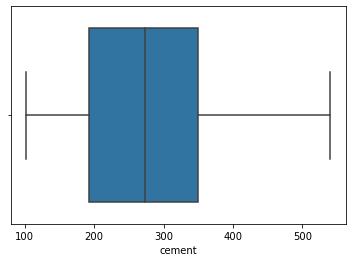

In [17]:
sns.boxplot(x='cement', data=df , orient='h')

Text(0.5, 1.0, 'cement')

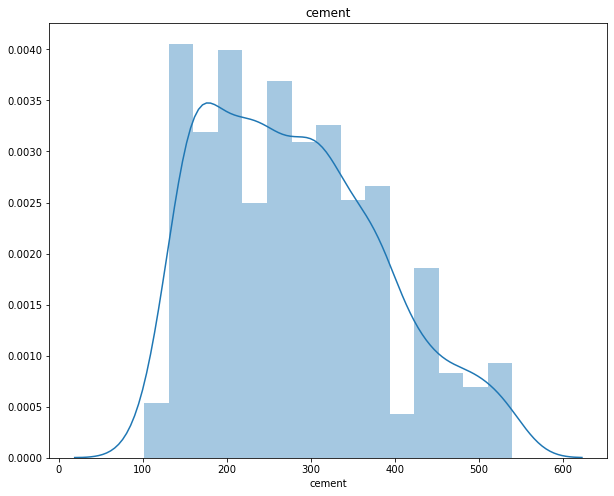

In [18]:
# distplot

plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title("cement")

### water

In [19]:
w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)
print('1st quantile(w_Q1) is:',w_Q1)
print('3rd quantile(w_Q3) is:',w_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['water']))

1st quantile(w_Q1) is: 164.9
3rd quantile(w_Q3) is: 192.0
Interquantile range (IQR) is: 27.099999999999994


In [20]:
# Outlier detection from Interquantile range (IQR) in original

W_L_outliers=w_Q1-1.5*(w_Q3-w_Q1)
W_U_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print('Lower outliers limit in cement:',W_L_outliers)
print('upper outliers limit in cement:',W_U_outliers)

Lower outliers limit in cement: 124.25000000000001
upper outliers limit in cement: 232.64999999999998


In [21]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in water upper :', df[df['water']>232.64999999999998]['water'].count())
print('numer of outlier in water lower :', df[df['water']<124.25000000000001]['water'].count())

print('% of outlier in water upper :', round(df[df['water']>232.64999999999998]['water'].count()*100/len(df)),'%')
print('% of outlier in water lower :', round(df[df['water']<-124.25000000000001]['water'].count()*100/len(df)),'%')

numer of outlier in water upper : 4
numer of outlier in water lower : 5
% of outlier in water upper : 0.0 %
% of outlier in water lower : 0.0 %


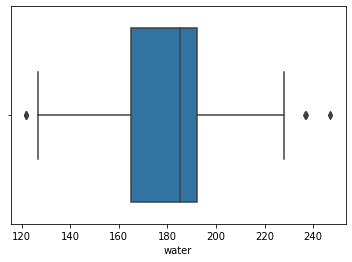

In [22]:
sns.boxplot(x='water', data=df)

Text(0.5, 1.0, 'water')

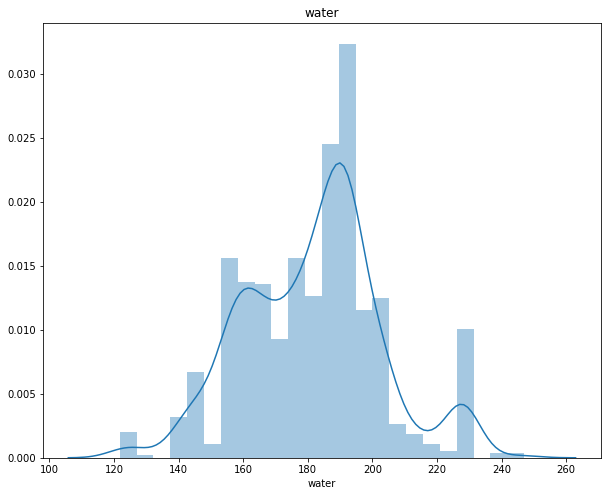

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title("water")

### Slag

In [24]:
S_Q1=df['slag'].quantile(q=0.25)
S_Q3=df['slag'].quantile(q=0.75)

In [25]:
print('1st quantile(S_Q1) is:',S_Q1)
print('3rd quantile(S_Q3) is:',S_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['slag']))

1st quantile(S_Q1) is: 0.0
3rd quantile(S_Q3) is: 142.95
Interquantile range (IQR) is: 142.95


In [26]:
# Outlier detection from Interquantile range (IQR) in original 

S_L_outliers=S_Q1-1.5*(S_Q3-S_Q1)
S_U_outliers=S_Q3+1.5*(S_Q3-S_Q1)
print('Lower outliers limit in cement:',S_L_outliers)
print('upper outliers limit in cement:',S_U_outliers)

Lower outliers limit in cement: -214.42499999999998
upper outliers limit in cement: 357.375


In [27]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in slag upper :', df[df['slag']>357.375]['slag'].count())
print('numer of outlier in blast lower :', df[df['slag']<-214.42499999999998]['slag'].count())

print('% of outlier in slag upper :', round(df[df['slag']>357.375]['slag'].count()*100/len(df)),'%')
print('% of outlier in slag lower :', round(df[df['slag']<-214.42499999999998]['slag'].count()*100/len(df)),'%')

numer of outlier in slag upper : 2
numer of outlier in blast lower : 0
% of outlier in slag upper : 0.0 %
% of outlier in slag lower : 0.0 %


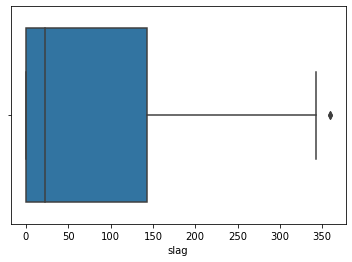

In [28]:
sns.boxplot(x='slag', data=df)

Text(0.5, 1.0, 'slag')

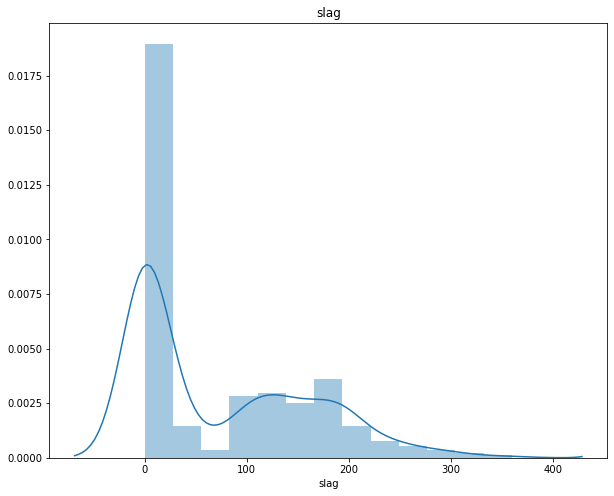

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title("slag")

### ASH

In [30]:
A_Q1=df['ash'].quantile(q=0.25)
A_Q3=df['ash'].quantile(q=0.75)

print('1st quantile(Q1) is:',A_Q1)
print('3rd quantile(Q3) is:',A_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['ash']))

1st quantile(Q1) is: 0.0
3rd quantile(Q3) is: 118.3
Interquantile range (IQR) is: 118.3


In [31]:
# Outlier detection from Interquantile range (IQR) in original 

A_L_outliers=A_Q1-1.5*(A_Q3-A_Q1)
A_U_outliers=A_Q3+1.5*(A_Q3-A_Q1)
print('Lower outliers limit in ash:',A_L_outliers)
print('upper outliers limit in ash:',A_U_outliers)

Lower outliers limit in ash: -177.45
upper outliers limit in ash: 295.75


In [32]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in ash upper :', df[df['ash']>295.75]['ash'].count())
print('numer of outlier in ash lower :', df[df['ash']<-177.459]['ash'].count())

print('% of outlier in ash upper :', round(df[df['ash']>295.75]['ash'].count()*100/len(df)),'%')
print('% of outlier in ash lower :', round(df[df['ash']<-177.45]['ash'].count()*100/len(df)),'%')

numer of outlier in ash upper : 0
numer of outlier in ash lower : 0
% of outlier in ash upper : 0.0 %
% of outlier in ash lower : 0.0 %


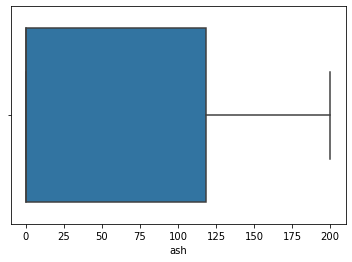

In [33]:
sns.boxplot(x='ash', data=df)

Text(0.5, 1.0, 'ash')

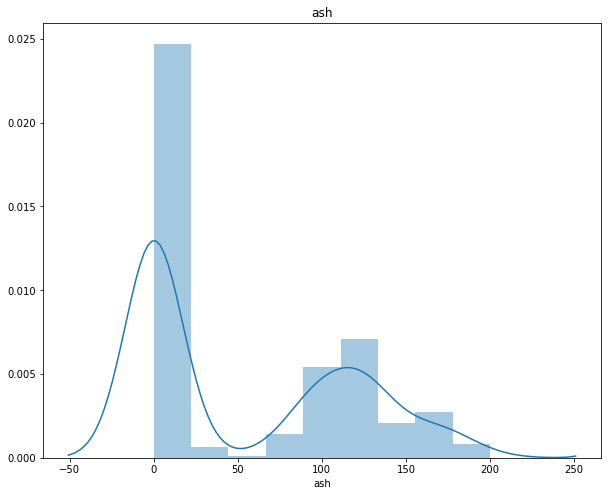

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title("ash")

### superplastic

In [35]:
SP_Q1=df['superplastic'].quantile(q=0.25)
SP_Q3=df['superplastic'].quantile(q=0.75)

print('1st quantile(Q1) is:',SP_Q1)
print('3rd quantile(Q3) is:',SP_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['superplastic']))

1st quantile(Q1) is: 0.0
3rd quantile(Q3) is: 10.2
Interquantile range (IQR) is: 10.2


In [36]:
# Outlier detection from Interquantile range (IQR) in original 

SP_L_outliers=SP_Q1-1.5*(SP_Q3-SP_Q1)
SP_U_outliers=SP_Q3+1.5*(SP_Q3-SP_Q1)
print('Lower outliers limit in superplastic:',SP_L_outliers)
print('upper outliers limit in superplastic:',SP_U_outliers)

Lower outliers limit in superplastic: -15.299999999999999
upper outliers limit in superplastic: 25.5


In [37]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in ash upper :', df[df['superplastic']>25.5]['superplastic'].count())
print('numer of outlier in ash lower :', df[df['superplastic']<-15.299999999999999]['superplastic'].count())

print('% of outlier in ash upper :', round(df[df['superplastic']>25.5]['superplastic'].count()*100/len(df)),'%')
print('% of outlier in ash lower :', round(df[df['superplastic']<-15.299999999999999]['superplastic'].count()*100/len(df)),'%')

numer of outlier in ash upper : 10
numer of outlier in ash lower : 0
% of outlier in ash upper : 1.0 %
% of outlier in ash lower : 0.0 %


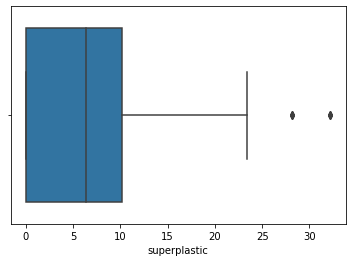

In [38]:
sns.boxplot(x='superplastic', data=df)

Text(0.5, 1.0, 'superplastic')

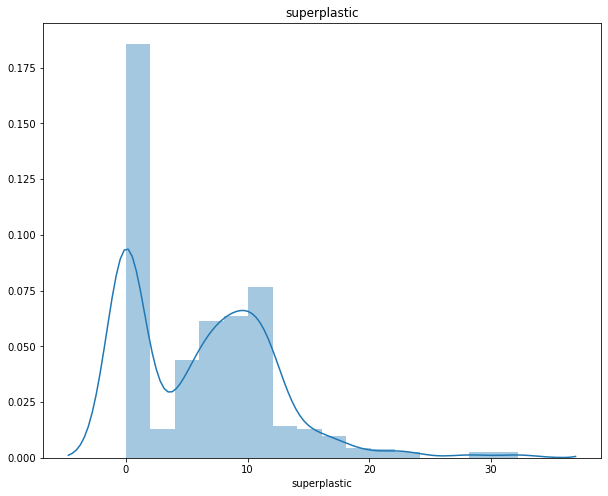

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(df['superplastic']).set_title("superplastic")

### coarseAgg

In [40]:
C_Q1=df['coarseAgg'].quantile(q=0.25)
C_Q3=df['coarseAgg'].quantile(q=0.75)

print('1st quantile(Q1) is:',C_Q1)
print('3rd quantile(Q3) is:',C_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['coarseAgg']))

1st quantile(Q1) is: 932.0
3rd quantile(Q3) is: 1029.4
Interquantile range (IQR) is: 97.40000000000009


In [41]:
# Outlier detection from Interquantile range (IQR) in original 

C_L_outliers=C_Q1-1.5*(C_Q3-C_Q1)
C_U_outliers=C_Q3+1.5*(C_Q3-C_Q1)
print('Lower outliers limit in coarseAgg:',C_L_outliers)
print('upper outliers limit in coarseAgg:',C_U_outliers)

Lower outliers limit in coarseAgg: 785.8999999999999
upper outliers limit in coarseAgg: 1175.5000000000002


In [42]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in coarseAgg upper :', df[df['coarseAgg']>1175.50]['coarseAgg'].count())
print('numer of outlier in coarseAgg lower :', df[df['coarseAgg']<785.89]['coarseAgg'].count())

print('% of outlier in coarseAgg upper :', round(df[df['coarseAgg']>1175.50]['coarseAgg'].count()*100/len(df)),'%')
print('% of outlier in coarseAgg lower :', round(df[df['coarseAgg']<785.89]['coarseAgg'].count()*100/len(df)),'%')

numer of outlier in coarseAgg upper : 0
numer of outlier in coarseAgg lower : 0
% of outlier in coarseAgg upper : 0.0 %
% of outlier in coarseAgg lower : 0.0 %


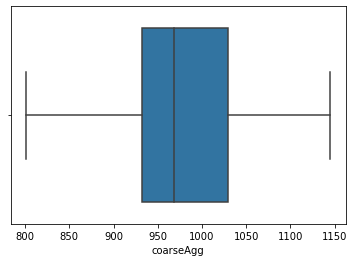

In [43]:
sns.boxplot(x='coarseAgg', data=df)

Text(0.5, 1.0, 'coarseAgg')

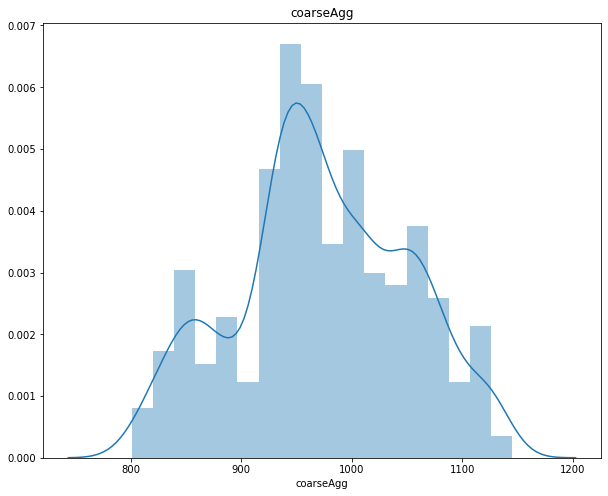

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(df['coarseAgg']).set_title("coarseAgg")

### fineagg

In [45]:
F_Q1=df['fineagg'].quantile(q=0.25)
F_Q3=df['fineagg'].quantile(q=0.75)

print('1st quantile(Q1) is:',F_Q1)
print('3rd quantile(Q3) is:',F_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['fineagg']))

1st quantile(Q1) is: 730.9499999999999
3rd quantile(Q3) is: 824.0
Interquantile range (IQR) is: 93.05000000000007


In [46]:
# Outlier detection from Interquantile range (IQR) in original 

F_L_outliers=F_Q1-1.5*(F_Q3-F_Q1)
F_U_outliers=F_Q3+1.5*(F_Q3-F_Q1)
print('Lower outliers limit in fineagg:',F_L_outliers)
print('upper outliers limit in fineagg:',F_U_outliers)

Lower outliers limit in fineagg: 591.3749999999998
upper outliers limit in fineagg: 963.575


In [47]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in fineagg upper :', df[df['fineagg']>963.575]['fineagg'].count())
print('numer of outlier in fineagg lower :', df[df['fineagg']<591.374]['fineagg'].count())

print('% of outlier in fineagg upper :', round(df[df['fineagg']>963.575]['fineagg'].count()*100/len(df)),'%')
print('% of outlier in fineagg lower :', round(df[df['fineagg']<591.374]['fineagg'].count()*100/len(df)),'%')

numer of outlier in fineagg upper : 5
numer of outlier in fineagg lower : 0
% of outlier in fineagg upper : 0.0 %
% of outlier in fineagg lower : 0.0 %


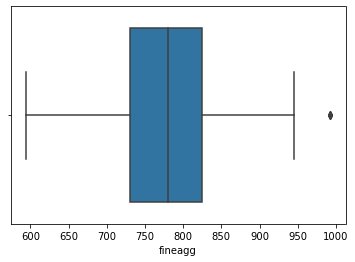

In [48]:
sns.boxplot(x='fineagg', data=df)

Text(0.5, 1.0, 'fineagg')

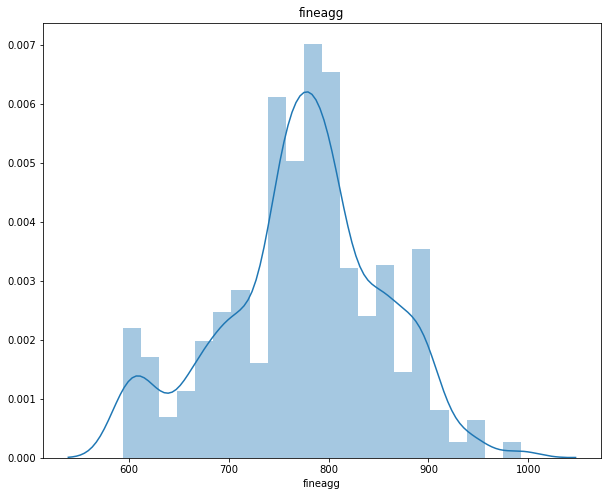

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(df['fineagg']).set_title("fineagg")

### AGE

In [50]:
AG_Q1=df['age'].quantile(q=0.25)
AG_Q3=df['age'].quantile(q=0.75)

print('1st quantile(Q1) is:',AG_Q1)
print('3rd quantile(Q3) is:',AG_Q3)
print('Interquantile range (IQR) is:',stats.iqr(df['age']))

1st quantile(Q1) is: 7.0
3rd quantile(Q3) is: 56.0
Interquantile range (IQR) is: 49.0


In [51]:
# Outlier detection from Interquantile range (IQR) in original 

AG_L_outliers=AG_Q1-1.5*(AG_Q3-AG_Q1)
AG_U_outliers=AG_Q3+1.5*(AG_Q3-AG_Q1)
print('Lower outliers limit in age:',AG_L_outliers)
print('upper outliers limit in age:',AG_U_outliers)

Lower outliers limit in age: -66.5
upper outliers limit in age: 129.5


In [52]:
# checking presence of outlier with upper and lower limits

print('numer of outlier in age upper :', df[df['age']>129.5]['age'].count())
print('numer of outlier in age lower :', df[df['age']<-66.5]['age'].count())

print('% of outlier in age upper :', round(df[df['age']>129.5]['age'].count()*100/len(df)),'%')
print('% of outlier in age lower :', round(df[df['age']<-66.5]['age'].count()*100/len(df)),'%')

numer of outlier in age upper : 59
numer of outlier in age lower : 0
% of outlier in age upper : 6.0 %
% of outlier in age lower : 0.0 %


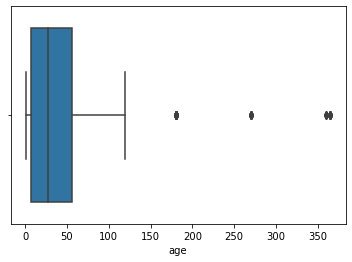

In [53]:
sns.boxplot(x='age' , data=df)

Text(0.5, 1.0, 'age')

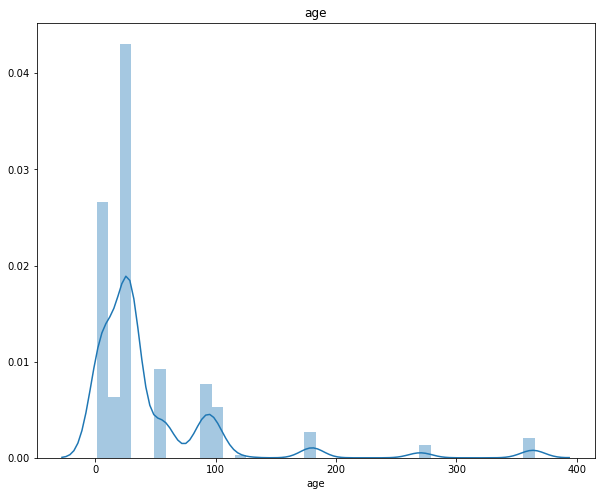

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title("age")

## Multivariate Analysis

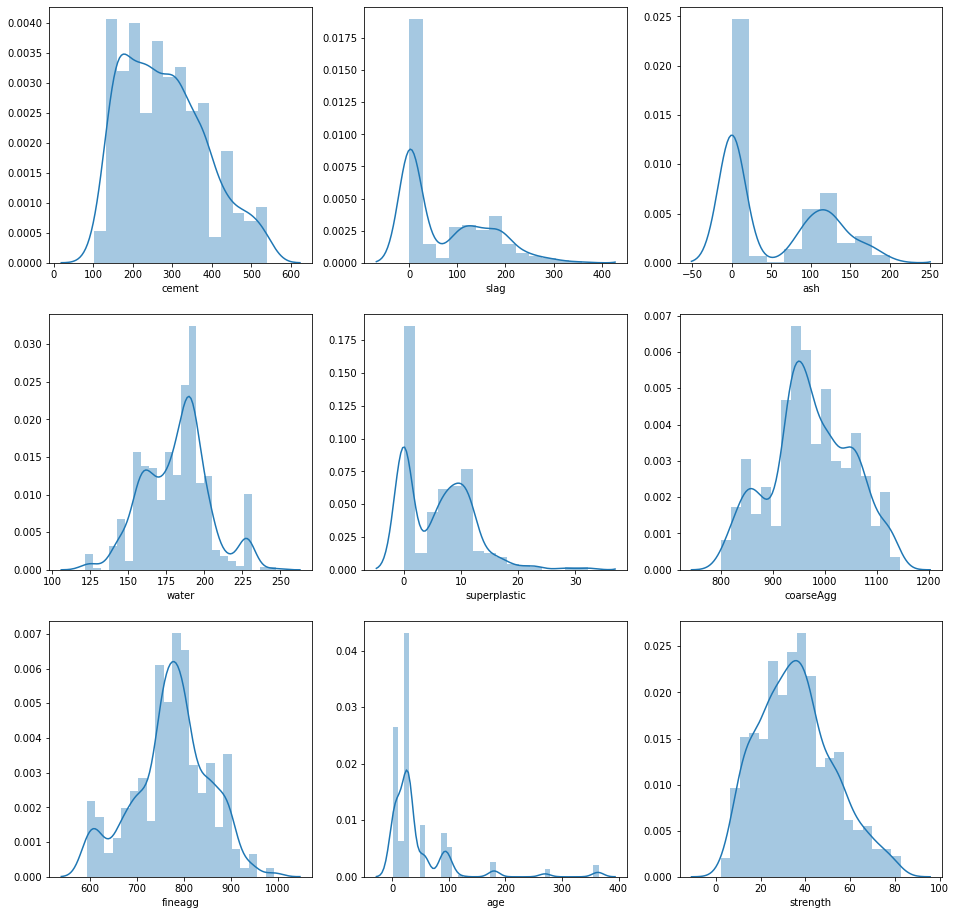

In [55]:
#distplot

fig, ax2=plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseAgg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

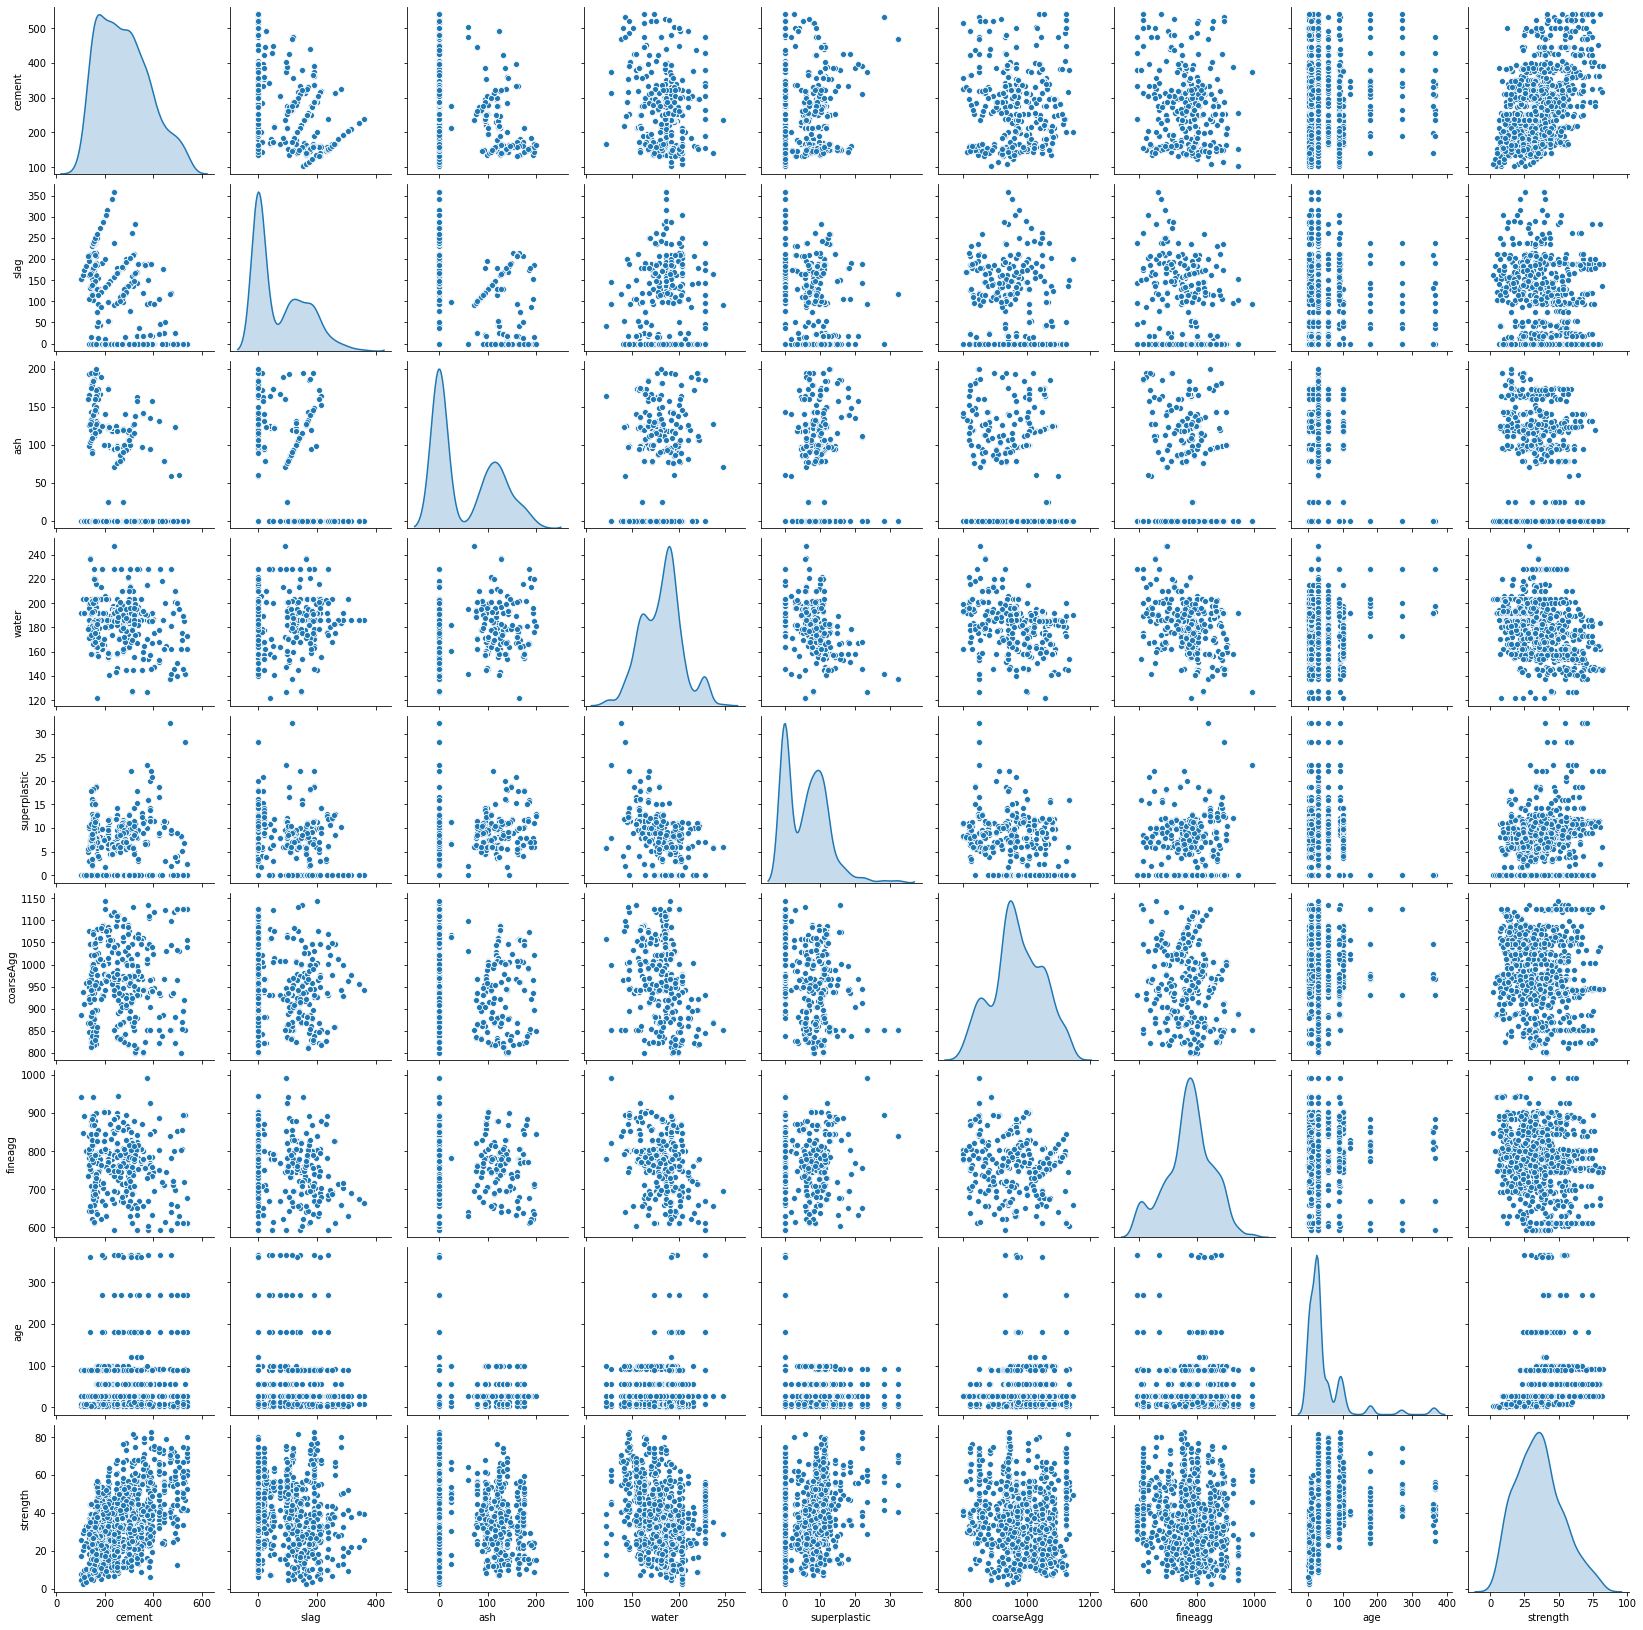

In [56]:
sns.pairplot(df, diag_kind='kde')

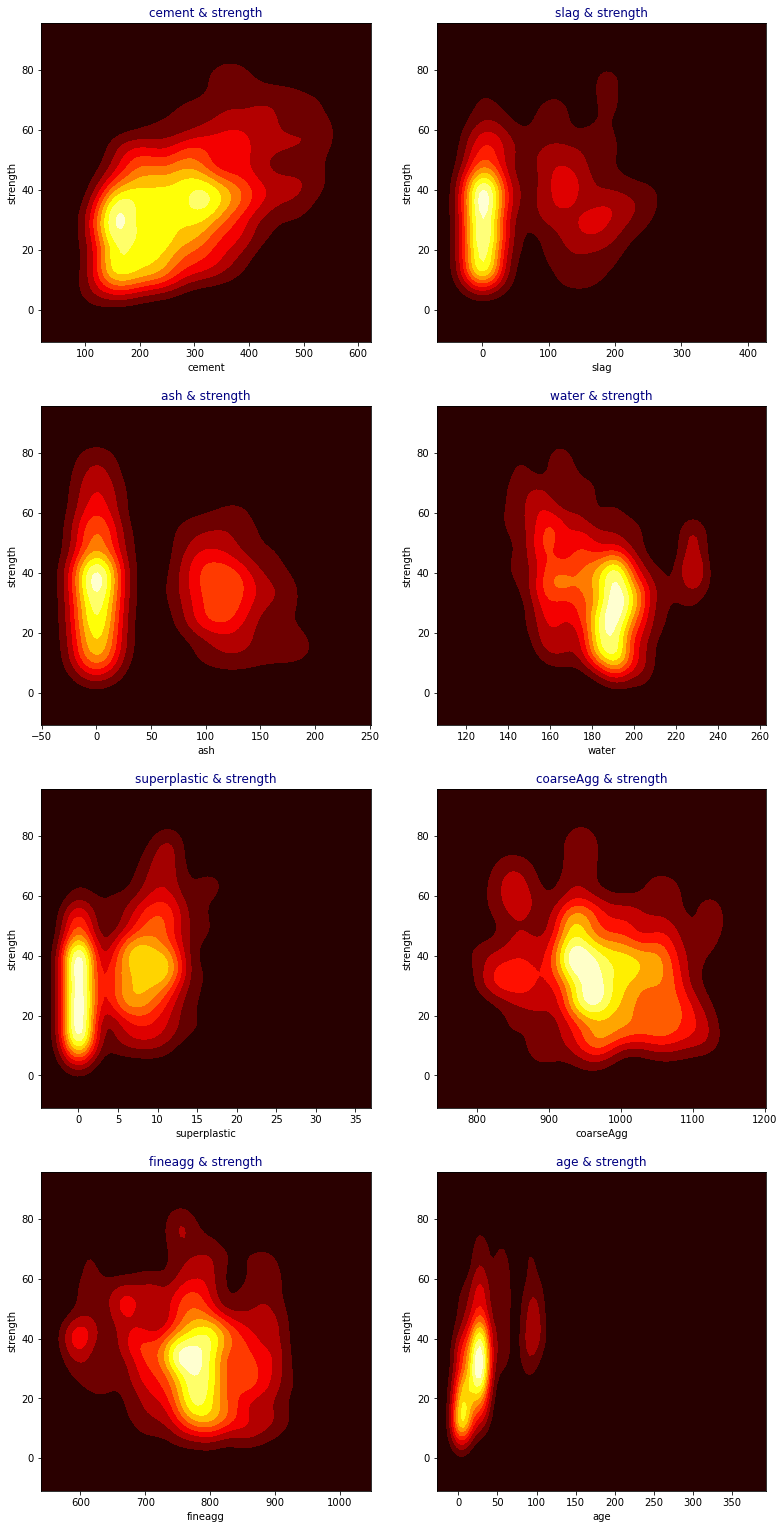

In [57]:
cols=[i for i in df.columns if i not in 'strength']
length= len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(df[i],
                df["strength"],
                cmap='hot',
                shade=True)
    plt.title(i+' & strength' ,color='navy')


### correlation between variables using heatmap

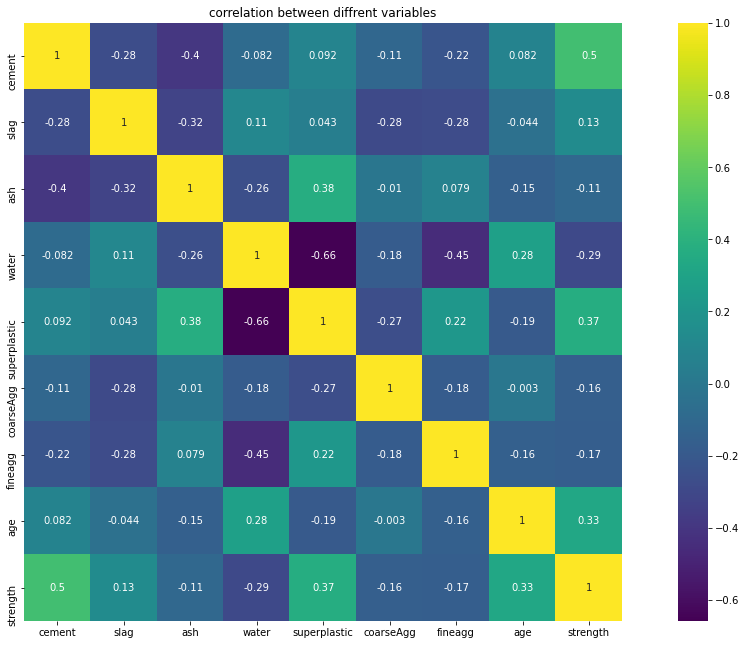

In [58]:
plt.figure(figsize=(20,11))

sns.heatmap(df.corr(),vmax=1 , square=True , annot=True, cmap='viridis')
plt.title('correlation between diffrent variables')
plt.show()

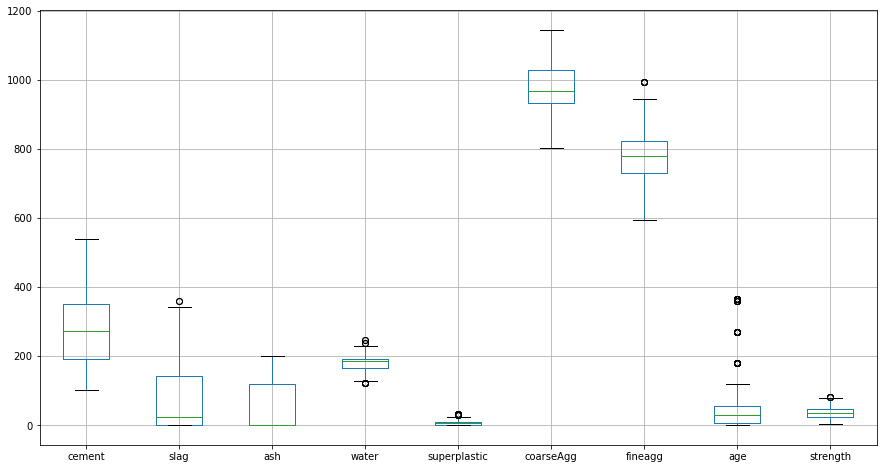

In [59]:
df.boxplot(figsize=(15,8))

### Checking for outlier

In [60]:
print('outlier in cement :', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('outlier in slag :', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('outlier in ash :', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('outlier in water :', df[((df.water - df.water.mean())/df.water.std()).abs()>3]['water'].count())
print('outlier in superplastic :', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('outlier in coarseAgg :', df[((df.coarseAgg - df.coarseAgg.mean())/df.coarseAgg.std()).abs()>3]['coarseAgg'].count())
print('outlier in fineagg :', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('outlier in age :', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

outlier in cement : 0
outlier in slag : 4
outlier in ash : 0
outlier in water : 2
outlier in superplastic : 10
outlier in coarseAgg : 0
outlier in fineagg : 0
outlier in age : 33


### replacing outlier by median

In [61]:
for cols in  df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = (Q3-Q1)
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols]< low) | (df[cols]> high) , cols]= df[cols].median()

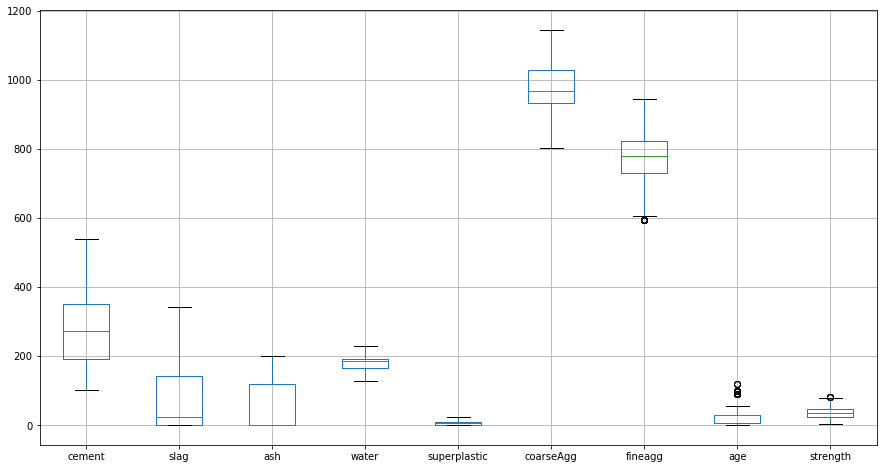

In [62]:
df.boxplot(figsize=(15,8))

### feature engineering and model building

In [63]:
# splitting the datset into train and test set

X= df.drop('strength', axis=1)
y= df['strength']

In [64]:
from scipy.stats import zscore

Xscaled=X.apply(zscore)
Xscaled_df= pd.DataFrame(Xscaled,columns=df.columns)
Xscaled.head()

,cement,slag,ash,water,superplastic,coarseAgg,fineagg,age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159


In [65]:
X_train, X_test, y_train, y_test=train_test_split(Xscaled,y , test_size=0.3, random_state=1)

### Random Forest

In [66]:
model= RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
y_pred=model.predict(X_test)

In [68]:
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.9813599693025792
 Accuracy of Test data set : 0.8731975006604794


 As Accuracy of Training data set is high and for test data is low in comparison to training data set.
    So, Model is overfitting

In [69]:
Acc_R= metrics.r2_score(y_test, y_pred)
Acc_R

0.8731975006604794

In [70]:
 metrics.mean_squared_error(y_test,y_pred)

33.23584792978232

In [71]:
metrics.mean_absolute_error(y_test,y_pred)

4.103891899111316

In [72]:
# store the accuracy resultfor each model in a dataframe for final comparison

result_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': Acc_R},index={'1'})
results= result_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198


## K-Fold cross validation

In [73]:
k=20

kfold=KFold(n_splits=k, random_state=70)
K_results=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.765713506574995

In [74]:
K_results

array([0.59577905, 0.82810361, 0.41357841, 0.96166878, 0.77213147,
       0.8688997 , 0.66263425, 0.70140432, 0.41931087, 0.50071568,
       0.79325821, 0.67885066, 0.89717882, 0.85014208, 0.85055793,
       0.83740904, 0.90429531, 0.94992972, 0.87254083, 0.95588138])

In [75]:
# store the accuracy resultfor each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results= pd.concat([results,random_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714


### Gradient Boosting Regressor

In [76]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred=model.predict(X_test)

In [78]:
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.9477368610390589
 Accuracy of Test data set : 0.8801574904351516


In [79]:
Acc_G= metrics.r2_score(y_test, y_pred)
Acc_G

0.8801574904351516

In [80]:
 metrics.mean_squared_error(y_test,y_pred)

31.411584504780972

In [81]:
# store the accuracy resultfor each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boosting Regressor'], 'accuracy': Acc_G},index={'3'})
results= pd.concat([results,gradient_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157


### K FOLD cross validation on gradient boosting

In [82]:
k=20

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.7704552951644352

In [83]:
# store the accuracy resultfor each model in a dataframe for final comparison

gradient_re1 = pd.DataFrame({'Algorithm': ['Gradient Boosting Regressor k_fold'], 'accuracy': accuracy},index={'4'})
results= pd.concat([results,gradient_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455


### Ada boostin regressor

In [84]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [85]:
y_pred=model.predict(X_test)

In [86]:
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.8249866696088327
 Accuracy of Test data set : 0.7613612057523907


In [87]:
Acc_A= metrics.r2_score(y_test, y_pred)
Acc_A

0.7613612057523907

In [88]:
 metrics.mean_squared_error(y_test,y_pred)

62.54894593617982

In [89]:
# store the accuracy resultfor each model in a dataframe for final comparison

adaboost_re = pd.DataFrame({'Algorithm': ['Adaboost Regressor'], 'accuracy': Acc_A},index={'5'})
results= pd.concat([results,adaboost_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361


### K FOLD cross validation on Ada boosting

In [90]:
k=20

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.5878621179564

In [91]:
# store the accuracy resultfor each model in a dataframe for final comparison

adaboost_re1 = pd.DataFrame({'Algorithm': ['Ada Boosting Regressor k_fold'], 'accuracy': accuracy},index={'6'})
results= pd.concat([results,adaboost_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862


### KNN Regressor

In [92]:
# checking for diffrent diffrent K value

diff_k=[]
for i in range(1,45):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    diff_k.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'mean error')

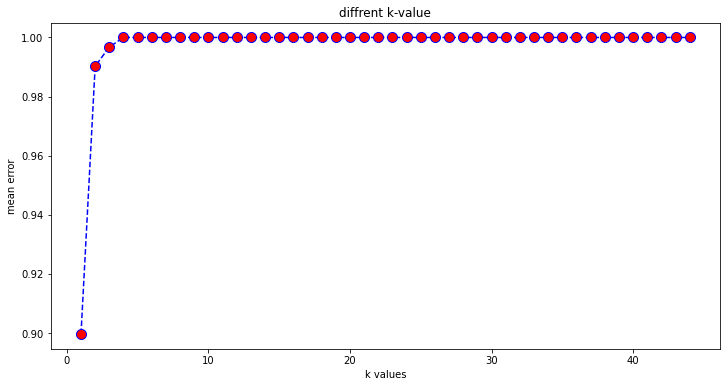

In [93]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('diffrent k-value')
plt.xlabel('k values')
plt.ylabel('mean error')

In [94]:
# k=3 is a better choise from the above plot

model=KNeighborsRegressor(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [95]:
y_pred=model.predict(X_test)

In [96]:
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.9075702785732312
 Accuracy of Test data set : 0.7539494934126327


In [97]:
Acc_KNN= metrics.r2_score(y_test, y_pred)
Acc_KNN

0.7539494934126327

In [98]:
 metrics.mean_squared_error(y_test,y_pred)

64.49160909744695

In [99]:
# store the accuracy resultfor each model in a dataframe for final comparison

KNN_re = pd.DataFrame({'Algorithm': ['KNN Regressor'], 'accuracy': Acc_KNN},index={'7'})
results= pd.concat([results,KNN_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949


### K FOLD cross validation on KNN

In [100]:
k=20

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.6907106255855276

In [101]:
# store the accuracy resultfor each model in a dataframe for final comparison

KNN_re1 = pd.DataFrame({'Algorithm': ['KNN Regressor k_fold'], 'accuracy': accuracy},index={'8'})
results= pd.concat([results,KNN_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711


# ## Bagging Regressor

In [102]:
model=BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [103]:
y_pred=model.predict(X_test)
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.9736530094302619
 Accuracy of Test data set : 0.8417613589841277


In [104]:
Acc_BAG= metrics.r2_score(y_test, y_pred)
Acc_BAG

0.8417613589841277

In [105]:
 metrics.mean_squared_error(y_test,y_pred)

41.47548697235976

In [106]:
# store the accuracy resultfor each model in a dataframe for final comparison

BAG_re = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': Acc_BAG},index={'9'})
results= pd.concat([results,BAG_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761


### K FOLD cross validation on Bagging

In [107]:
k=20

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.735344627370245

In [108]:
# store the accuracy resultfor each model in a dataframe for final comparison

BAG_re1 = pd.DataFrame({'Algorithm': ['Bagging Regressor k_fold'], 'accuracy': accuracy},index={'10'})
results= pd.concat([results,BAG_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761
10,Bagging Regressor k_fold,0.735345


### SVR

In [109]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [110]:
y_pred=model.predict(X_test)
# model performance on training dataset

print(" Accuracy of Training data set :",model.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",model.score(X_test, y_test))

 Accuracy of Training data set : 0.7296525761559518
 Accuracy of Test data set : 0.6549962611822544


In [111]:
Acc_SVR= metrics.r2_score(y_test, y_pred)
Acc_SVR

0.6549962611822544

In [112]:
 metrics.mean_squared_error(y_test,y_pred)

90.42796363067555

In [113]:
# store the accuracy resultfor each model in a dataframe for final comparison

SVR_re = pd.DataFrame({'Algorithm': ['SVR Regressor'], 'accuracy': Acc_BAG},index={'11'})
results= pd.concat([results,SVR_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761
10,Bagging Regressor k_fold,0.735345


### K FOLD cross validation on SVR

In [114]:
k=10

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.6685376577727407

In [115]:
# store the accuracy resultfor each model in a dataframe for final comparison

SVR_re1 = pd.DataFrame({'Algorithm': ['SVR Regressor k_fold'], 'accuracy': accuracy},index={'12'})
results= pd.concat([results,SVR_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761
10,Bagging Regressor k_fold,0.735345


### XG Boost regressor

In [116]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr=XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_pred=model.predict(X_test)
# model performance on training dataset

print(" Accuracy of Training data set :",xgr.score(X_train, y_train))

# model performance on test dataset

print(" Accuracy of Test data set :",xgr.score(X_test, y_test))

 Accuracy of Training data set : 0.9924341146964205
 Accuracy of Test data set : 0.9004226612596836


In [124]:
Acc_XGR= metrics.r2_score(y_test, y_pred)
Acc_XGR 

0.6549962611822544

In [119]:
 metrics.mean_squared_error(y_test,y_pred)

90.42796363067555

In [120]:
# store the accuracy resultfor each model in a dataframe for final comparison

XGR_re = pd.DataFrame({'Algorithm': ['XGR Regressor'], 'accuracy': Acc_XGR},index={'13'})
results= pd.concat([results,XGR_re])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761
10,Bagging Regressor k_fold,0.735345


### K FOLD cross validation on XGR

In [121]:
k=10

kfold=KFold(n_splits=k, random_state=70)
K_results3=cross_val_score(model,X,y, cv=kfold)
accuracy=np.mean(abs(K_results3))
accuracy

0.6685376577727407

In [122]:
# store the accuracy resultfor each model in a dataframe for final comparison

XGR_re1 = pd.DataFrame({'Algorithm': ['XGR Regressor k_fold'], 'accuracy': accuracy},index={'12'})
results= pd.concat([results,XGR_re1])
results= results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.873198
2,Random Forest Regressor k_fold,0.765714
3,Gradient Boosting Regressor,0.880157
4,Gradient Boosting Regressor k_fold,0.770455
5,Adaboost Regressor,0.761361
6,Ada Boosting Regressor k_fold,0.587862
7,KNN Regressor,0.753949
8,KNN Regressor k_fold,0.690711
9,Bagging Regressor,0.841761
10,Bagging Regressor k_fold,0.735345
